# Myopia

In [1]:
#import dependencies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## Prep the Data



In [ ]:
# Import the data


In [2]:
file = Path ('Resources/myopia.csv')
df = pd.read_csv(file)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
classes = df['MYOPIC']

In [4]:
#dropping MYOPIC column from the dataset
df1=df.drop(['MYOPIC'], axis=1)
df1.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
#Standardise the dataset so that columns with larger values don't influence the outcome more than columns with smaller values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_data = scaler.fit_transform(df1)

In [7]:
# Create a DataFrame with the transformed data
df2 = pd.DataFrame(scaler_data, columns=df1.columns)
df2.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [8]:
# checking the number of the features:
df2.shape

(618, 14)

## Apply Dimensionality Reduction


In [12]:
# using PCA to perform dimensionality reduction
from sklearn.decomposition import PCA

# initialise PCA model with preserve 90% of the explained variance in dimensionality reduction
pca = PCA (n_components=0.90)

df2_pca = pca.fit_transform(df2)


In [13]:
# Get the desired explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915189

In [14]:
# checking the number of the features change
df2_pca.shape

(618, 10)

In [ ]:
#Features have changed from 14 to 10 after performing dimensionality reduction with PCA

In [15]:
# Using t-SNE to further reduce the dataset dimensions
from sklearn.manifold import TSNE

# initialise t-SNE model
tsne = TSNE(n_components=3, random_state=42, learning_rate= 400)

In [16]:
# reduce dimensions:
tsne_features = tsne.fit_transform(df2_pca)

In [17]:
# Train a Random Forest Classifier model and print the model score
# checking the number of the features change:
tsne_features.shape

(618, 3)

In [18]:
tsne_features

array([[  17.266169 ,   56.279858 ,  -22.442549 ],
       [  17.684536 ,    2.5413282, -111.575386 ],
       [  42.02932  ,  142.32254  ,  -39.474712 ],
       ...,
       [ -15.484542 ,  -95.58231  , -104.186005 ],
       [  35.928017 ,  -45.402573 ,   87.022    ],
       [  32.772324 ,  -15.057206 ,  -74.81014  ]], dtype=float32)

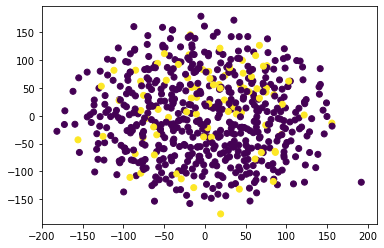

In [19]:
# Prepare to plot the dataset 

plt.scatter(tsne_features[:,0], tsne_features[:,1], c =classes)
plt.show()

## Cluster Analysis with K-means:

In [21]:
from sklearn.cluster import KMeans
inertia =[]
k = list (range(1,11))

for i in k:
    km = KMeans (n_clusters=i, random_state= 0)
    km.fit (new_df1_pca)
    inertia.append (km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

c:\Users\tkg37kk\.conda\envs\Pythondata\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


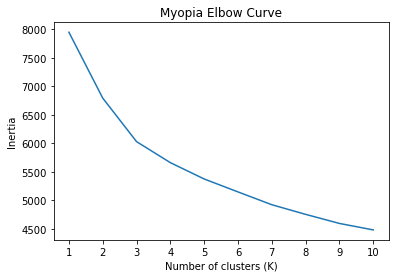

In [22]:
plt.plot (df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Myopia Elbow Curve')
plt.show()

## Recommendation 
#### Based on the above TSNE and K-Means models, the patients can't be clustered. As a result, more training data and/or different models need to be used.